In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import sqlite3 
from scipy.stats import ttest_ind
import scipy.stats as stats 
warnings.filterwarnings ('ignore')

In [2]:
# Loading the dataset 

conn = sqlite3.connect('inventory.db')

#fetching vendor summary data 
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,131799.0,4743272.01,631601.09,242165.82,68601.68,932020.41,19.649314,0.908457,1.244544
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,146015.0,4406487.81,527854.98,268288.31,144929.24,602446.59,13.671809,0.890129,1.158370
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,174191.0,4233948.59,432764.23,320061.28,123780.22,815644.91,19.264403,0.929480,1.238611
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,177141.0,3987514.59,393938.45,325483.26,257032.07,726316.65,18.214771,0.878318,1.222715
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,124199.0,3874054.01,511019.87,228202.17,257032.07,850848.00,21.962729,0.899282,1.281439


In [3]:
#EDA 

#summary statistics 
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,2.792616e+03,10026.894152,0.00,27.000000,226.500000,1720.250000,3.109850e+05
TotalSalesDollars,10692.0,3.819878e+04,153079.348385,0.00,603.802500,4621.715000,25601.127500,4.743272e+06
TotalSalesPrice,10692.0,1.711084e+04,41438.069644,0.00,229.947500,2474.230000,14519.155000,6.316011e+05


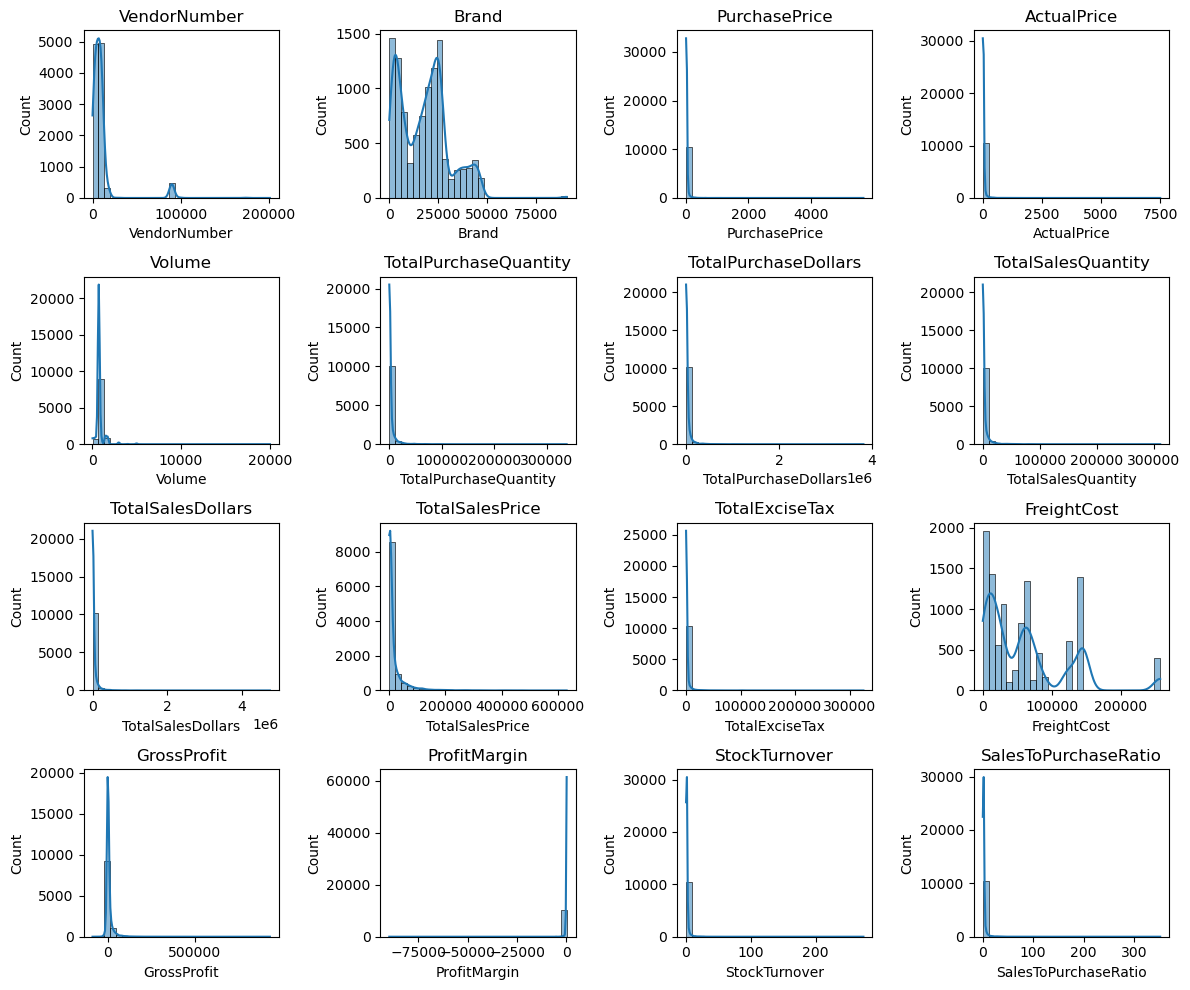

In [4]:
#Check for any outliers - create histogram 

numerical_cols = df.select_dtypes (include=np.number). columns #storing all numerical values in a single column

plt.figure (figsize=(12,10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4, i+1) #to adjust the layout 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

#the plot shows that outliers exists 

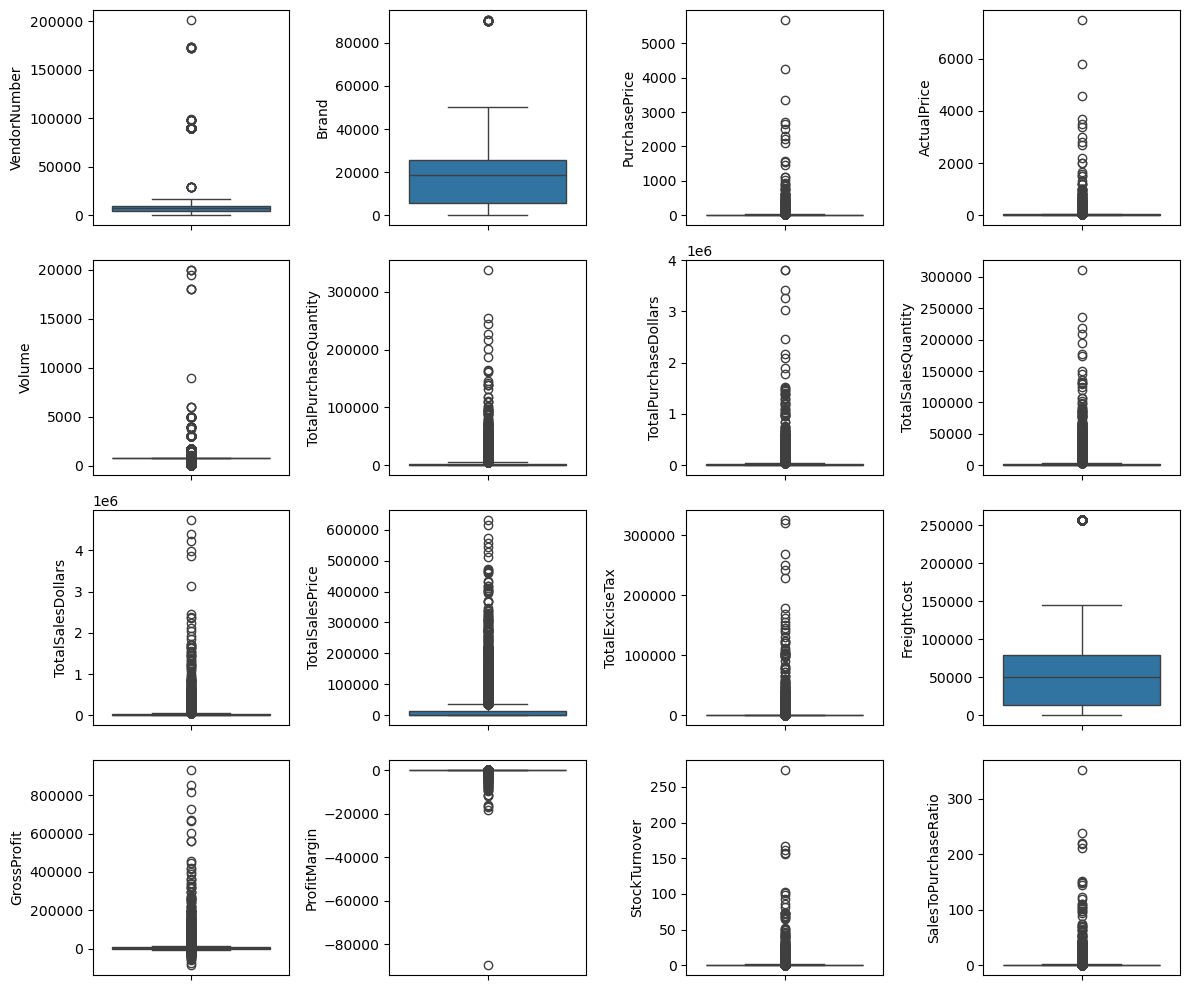

In [5]:
#visualizing outliers through boxplot 

plt.figure (figsize=(12,10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4, i+1) #to adjust the layout 
    sns.boxplot(y=df[col]) 
plt.tight_layout()
plt.show()

1. Negative and Zero Values

Gross Profit: The lowest value is –52,002.78, which means some products are being sold at a loss. This may be due to high purchasing costs, discounting, or pricing errors.

Profit Margin: The minimum margin is negative infinity, which happens when revenue is zero or extremely low. This indicates products that never generated sales.

Sales Quantity & Sales Dollars: Some items show zero sales, meaning they were purchased but never sold. These may be slow-moving, obsolete, or incorrectly listed products.

2. Outliers Highlighted by High Variability

Purchase Price & Actual Price: Maximum prices (5,681.81 and 7,499.99) are far above the averages (24.39 and 35.64). These items are likely premium or specialty products that behave very differently from the rest of the catalog.

Freight Cost: Values range from 0.09 to 257,032.07, showing extreme variation. This could point to logistics inefficiencies, unusual shipments, or batch/bulk transportation.

Stock Turnover: Values range from 0 to 274.5.

Low values (close to 0) suggest items that barely sell.

Very high values (above 1) mean products are selling faster than they are purchased, which may indicate demand surges or fulfillment from older inventory.

In [6]:
#filtering the data to remove inconsistencies 
df =pd.read_sql_query ("""select * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0 
AND TotalSalesQuantity > 0""", conn)


In [7]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,131799.0,4743272.01,631601.09,242165.82,68601.68,932020.41,19.649314,0.908457,1.244544
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,146015.0,4406487.81,527854.98,268288.31,144929.24,602446.59,13.671809,0.890129,1.158370
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,174191.0,4233948.59,432764.23,320061.28,123780.22,815644.91,19.264403,0.929480,1.238611
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,177141.0,3987514.59,393938.45,325483.26,257032.07,726316.65,18.214771,0.878318,1.222715
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,124199.0,3874054.01,511019.87,228202.17,257032.07,850848.00,21.962729,0.899282,1.281439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7924,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,14.0,27.86,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859
7925,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
7926,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
7927,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,69.0,137.31,71.64,14.49,257032.07,135.84,98.929430,69.000000,93.408163


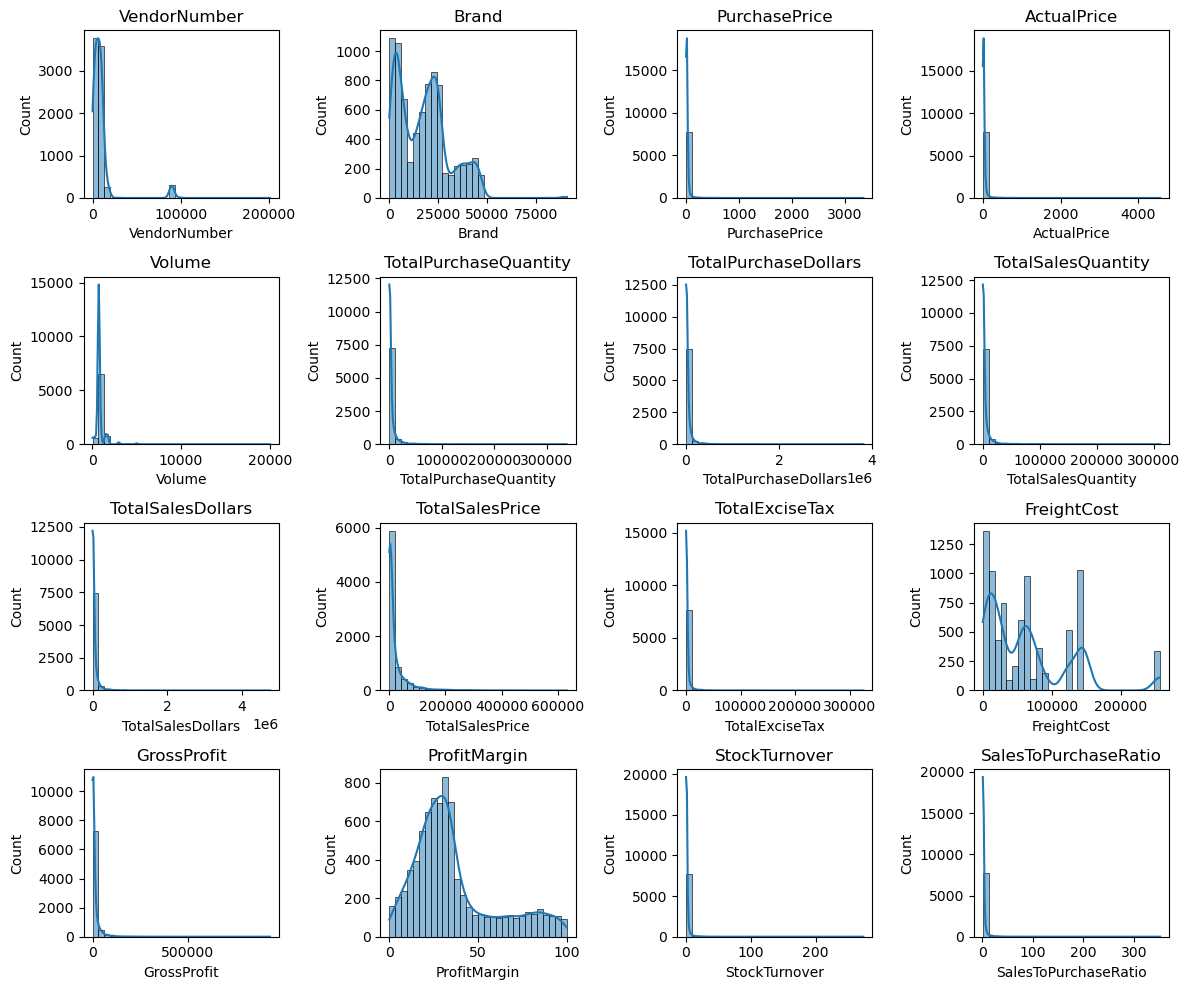

In [8]:
#creating histogram after cleaning the data 
numerical_cols = df.select_dtypes (include=np.number). columns #storing all numerical values in a single column

plt.figure (figsize=(12,10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4,4, i+1) #to adjust the layout 
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

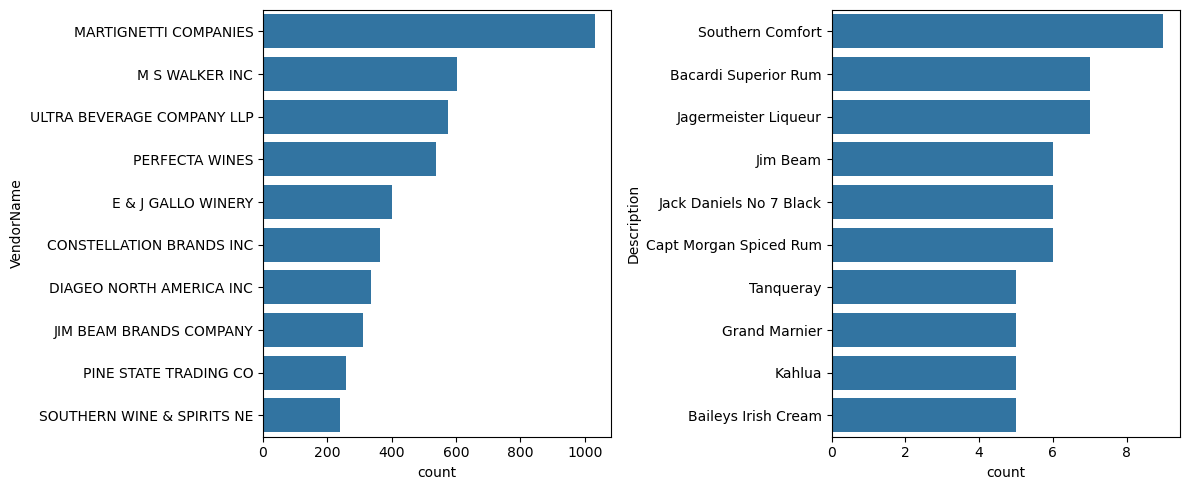

In [9]:
#creating countplot for categorical data 
categorical_cols = ["VendorName","Description"]

plt.figure (figsize=(12,5))
for i, col in enumerate (categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col], order = df[col].value_counts().index[:10]) #Top 10 categories
plt.tight_layout()
plt.show()

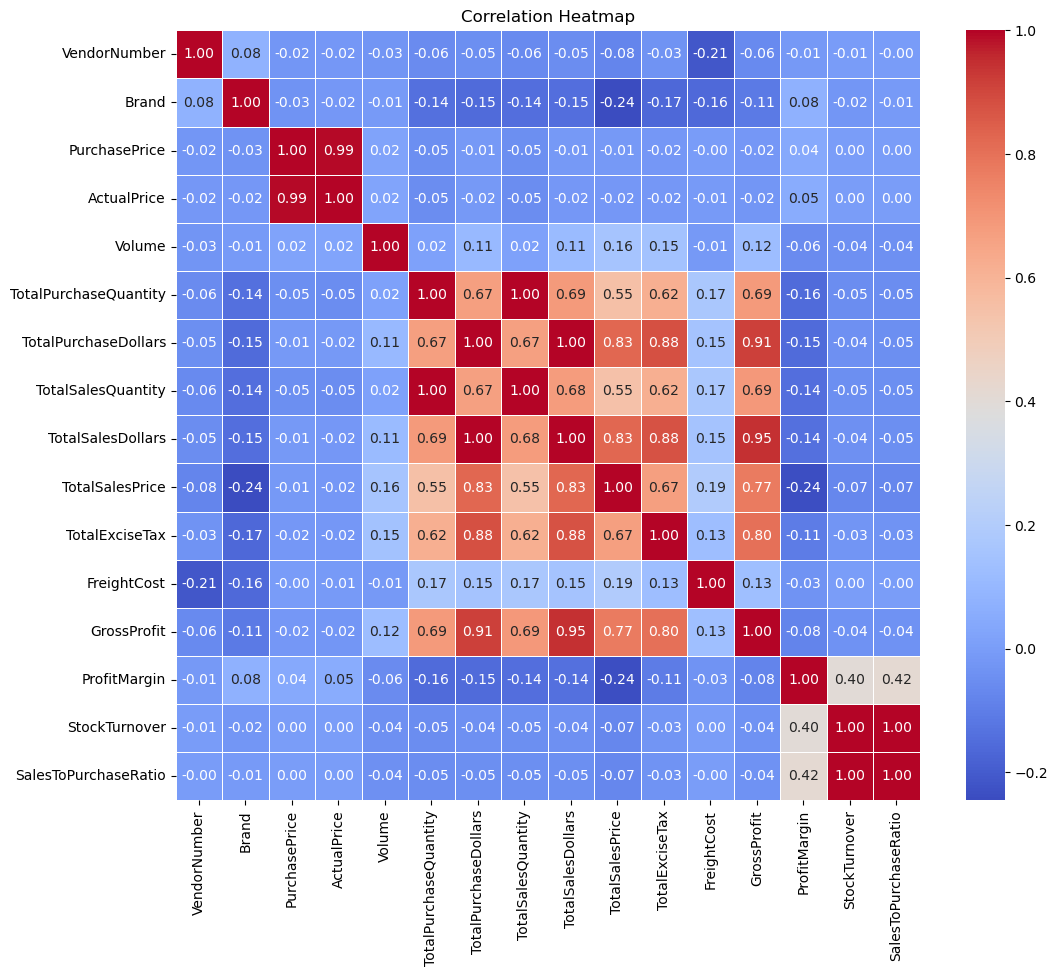

In [10]:
#Exploring the relationship between the variables (Correlation Heatmap)

plt.figure(figsize=(12,10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.6)
plt.title("Correlation Heatmap")
plt.show()

#Insights from the heatmap

PurchasePrice shows weak correlations with both TotalSalesDollars (-0.012) and GrossProfit (-0.016).
This suggests that variations in purchase price do not strongly influence sales revenue or profitability.

There is a strong positive correlation between TotalPurchaseQuantity and TotalSalesQuantity (0.999).
This indicates that products purchased in higher quantities tend to sell in higher quantities, reflecting efficient inventory movement.

A negative correlation exists between ProfitMargin and TotalSalesPrice (-0.179).
This implies that as sales prices increase, margins may decrease—possibly due to discounts, competitive pricing pressure, or higher associated costs.

StockTurnover shows weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055).
This indicates that a faster turnover rate does not necessarily translate to higher profit or stronger margins.

#Research Questions 
1. Identify brands that need promotional or pricing adjustments, particularly those showing lower sales performance but higher profit margins.

In [11]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
})

In [12]:
brand_performance

,TotalSalesDollars,ProfitMargin
Description,,
(RI) 1,19971.53,11.711321
.nparalleled Svgn Blanc,1094.63,29.978166
10 Span Cab Svgn CC,2561.58,16.545257
10 Span Chard CC,3190.74,24.756013
10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...
Zorvino Vyds Peachez,13406.58,12.204604
Zorvino Vyds Pearz,18131.85,21.785422
Zorvino Vyds Sangiovese,8518.18,12.475435


In [13]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [14]:
low_sales_threshold

np.float64(587.108)

In [15]:
high_margin_threshold

np.float64(66.2142934702271)

In [16]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margins:


,TotalSalesDollars,ProfitMargin
Description,,
Santa Rita Organic Svgn Bl,9.99,66.466466
Concannon Glen Ellen Wh Zin,15.95,83.448276
Crown Royal Apple,27.86,89.806174
Sauza Sprklg Wild Berry Marg,27.96,82.153076
Merry Irish Cream Liqueur,35.97,73.533500
...,...,...
Dad's Hat Rye Whiskey,538.89,81.851584
Goulee Cos d'Estournel 10,558.87,69.434752
Harthill Farms Cab Svgn,560.92,89.346074


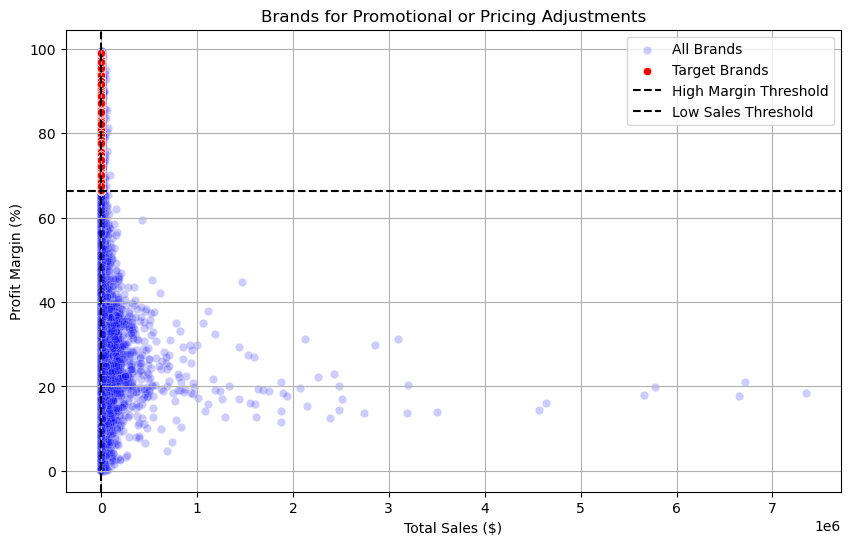

In [17]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',
                color="blue", label="All Brands", alpha=0.2)

sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',
                color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
#For better visualization 
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] 

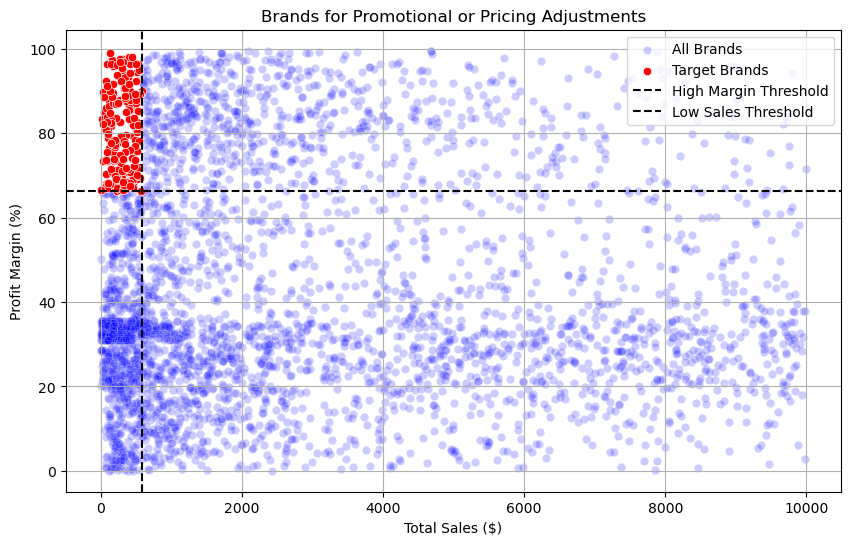

In [19]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',
                color="blue", label="All Brands", alpha=0.2)

sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',
                color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


#Research Question 2 
Which vendor and brands show high sales performance?  

In [20]:
#standerdizing the Total sales dollars for easy readability  
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [21]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

top_vendors.apply(lambda x: format_dollars(x))


VendorName
DIAGEO NORTH AMERICA INC      59.82M
MARTIGNETTI COMPANIES         35.12M
JIM BEAM BRANDS COMPANY       28.25M
PERNOD RICARD USA             27.79M
BACARDI USA INC               22.73M
CONSTELLATION BRANDS INC      21.93M
E & J GALLO WINERY            16.49M
BROWN-FORMAN CORP             16.17M
ULTRA BEVERAGE COMPANY LLP    14.55M
M S WALKER INC                13.18M
Name: TotalSalesDollars, dtype: object

In [22]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.35M
Tito's Handmade Vodka      6.71M
Grey Goose Vodka           6.65M
Absolut 80 Proof           5.78M
Capt Morgan Spiced Rum     5.66M
Ketel One Vodka            4.64M
Jameson Irish Whiskey      4.57M
Baileys Irish Cream        3.50M
Tanqueray                  3.20M
Kahlua                     3.19M
Name: TotalSalesDollars, dtype: object

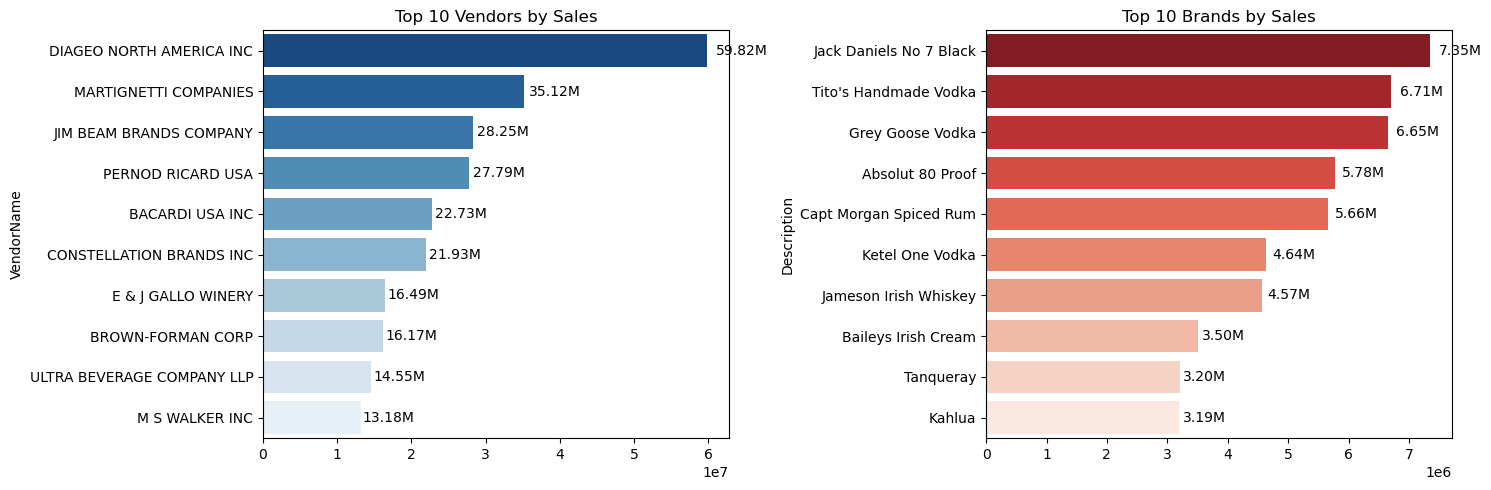

In [23]:
 #visualizing the top vendors and brands 
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


#Research Question 3
Which vendors contribute the most to purchase  dollars

In [24]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()


In [25]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [26]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False), 2)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,48352966.14,11465980.95,59818947.09,16.22
57,MARTIGNETTI COMPANIES,24998075.62,10121374.44,35119450.06,8.39
46,JIM BEAM BRANDS COMPANY,22887704.26,5366613.46,28254317.72,7.68
68,PERNOD RICARD USA,22843197.23,4948146.75,27791343.98,7.66
6,BACARDI USA INC,17309903.53,5424407.20,22734310.73,5.81
...,...,...,...,...,...
44,"IRA GOLDMAN AND WILLIAMS, LLP",190.88,474.94,665.82,0.00
33,FANTASY FINE WINES CORP,128.64,174.98,303.62,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [27]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,48.35M,11.47M,59.82M,16.22
57,MARTIGNETTI COMPANIES,25.00M,10.12M,35.12M,8.39
46,JIM BEAM BRANDS COMPANY,22.89M,5.37M,28.25M,7.68
68,PERNOD RICARD USA,22.84M,4.95M,27.79M,7.66
6,BACARDI USA INC,17.31M,5.42M,22.73M,5.81
20,CONSTELLATION BRANDS INC,15.02M,6.91M,21.93M,5.04
11,BROWN-FORMAN CORP,12.78M,3.39M,16.17M,4.29
30,E & J GALLO WINERY,11.83M,4.66M,16.49M,3.97
105,ULTRA BEVERAGE COMPANY LLP,10.60M,3.94M,14.55M,3.56
53,M S WALKER INC,9.48M,3.69M,13.18M,3.18


In [28]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,48.35M,11.47M,59.82M,16.22,16.22
57,MARTIGNETTI COMPANIES,25.00M,10.12M,35.12M,8.39,24.61
46,JIM BEAM BRANDS COMPANY,22.89M,5.37M,28.25M,7.68,32.29
68,PERNOD RICARD USA,22.84M,4.95M,27.79M,7.66,39.95
6,BACARDI USA INC,17.31M,5.42M,22.73M,5.81,45.76
20,CONSTELLATION BRANDS INC,15.02M,6.91M,21.93M,5.04,50.80
11,BROWN-FORMAN CORP,12.78M,3.39M,16.17M,4.29,55.09
30,E & J GALLO WINERY,11.83M,4.66M,16.49M,3.97,59.06
105,ULTRA BEVERAGE COMPANY LLP,10.60M,3.94M,14.55M,3.56,62.62
53,M S WALKER INC,9.48M,3.69M,13.18M,3.18,65.80


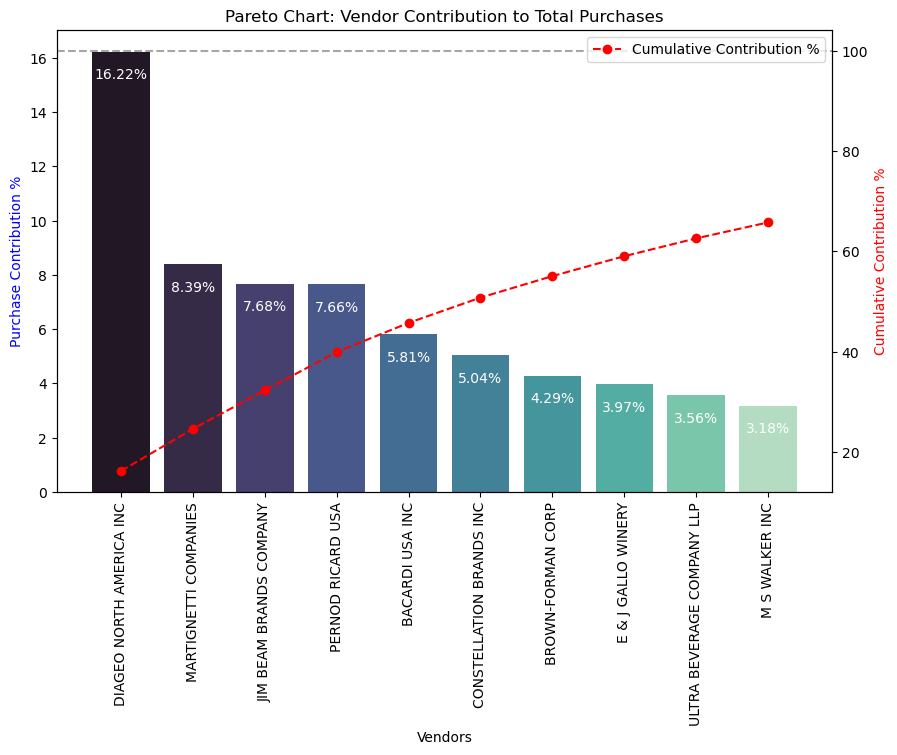

In [29]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


#Research Question 3 
how much of total procurement is dependent on top vendors? 

In [30]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)} %")


Total Purchase Contribution of top 10 vendors is 65.8 %


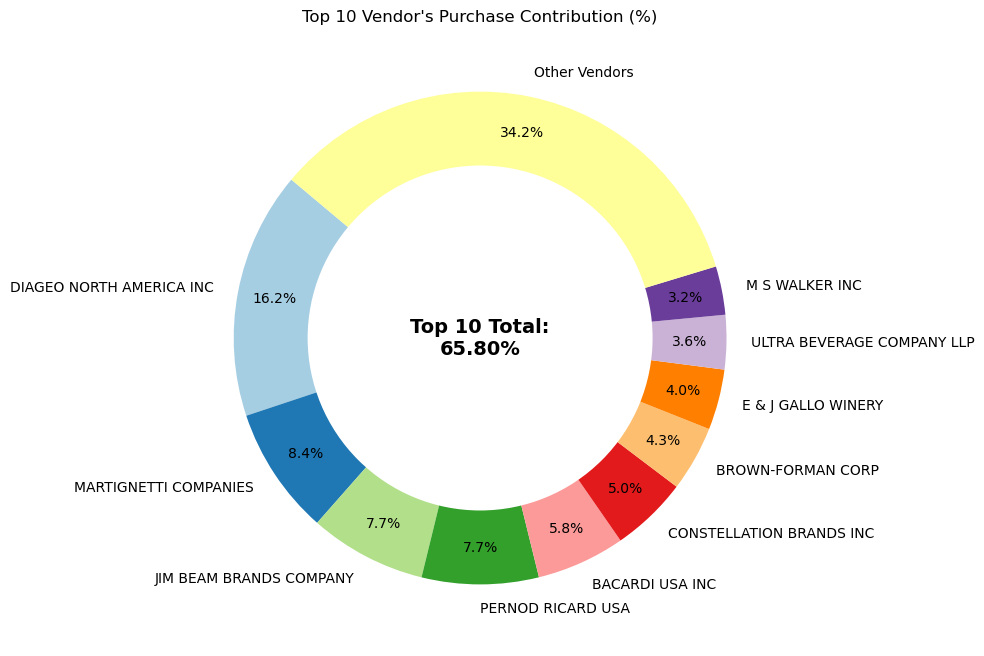

In [31]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


#Research Question 4
Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], 3, labels=["Small", "Medium", "Large"])


In [33]:
df[['OrderSize', 'TotalPurchaseQuantity']]


,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
7924,Small,2
7925,Small,2
7926,Small,6
7927,Small,1


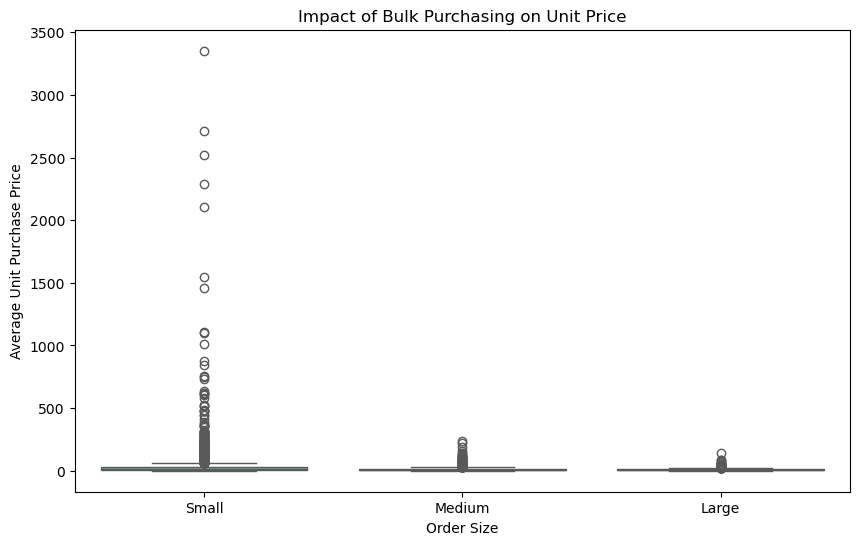

In [34]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

The price difference between Small and Large orders is substantial (~72% reduction in unit cost).

This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#Research Question 5
Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [35]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean()


,StockTurnover
VendorName,
ADAMBA IMPORTS INTL INC,0.769231
ALISA CARR BEVERAGES,0.500000
ALTAMAR BRANDS LLC,0.881250
AMERICAN SPIRITS EXCHANGE,0.833333
AMERICAN VINTAGE BEVERAGE,0.882007
...,...
WEIN BAUER INC,0.804725
WESTERN SPIRITS BEVERAGE CO,0.863266
WILLIAM GRANT & SONS INC,0.850402


In [36]:
df[df['StockTurnover'] < 1] \
    .groupby('VendorName')[['StockTurnover']] \
    .mean() \
    .sort_values('StockTurnover', ascending=True) \
    .head(10)


,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.500000
WALPOLE MTN VIEW WINERY,0.673521
Dunn Wine Brokers,0.704449
HIGHLAND WINE MERCHANTS LLC,0.708333
SOUTHERN GLAZERS W&S OF NE,0.711498
FULCHINO VINEYARD INC,0.720780
BRONCO WINE COMPANY,0.724318
THE IMPORTED GRAPE LLC,0.756209
KLIN SPIRITS LLC,0.756783


#Research Question 6
How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [37]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]

print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))


Total Unsold Capital: 28.38M


In [38]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)

inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,5.06M
68,PERNOD RICARD USA,2.56M
46,JIM BEAM BRANDS COMPANY,2.32M
57,MARTIGNETTI COMPANIES,2.17M
20,CONSTELLATION BRANDS INC,1.37M
61,MOET HENNESSY USA INC,1.32M
30,E & J GALLO WINERY,1.28M
11,BROWN-FORMAN CORP,1.22M
6,BACARDI USA INC,1.13M
79,SAZERAC CO INC,1.01M


In [39]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)


In [40]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [41]:
top_vendors


0       19.649314
1       13.671809
2       19.264403
3       18.214771
4       21.962729
          ...    
3325    76.170222
3340    79.281118
3488    85.574469
4481    92.985834
4640    94.992938
Name: ProfitMargin, Length: 1983, dtype: float64

In [42]:
low_vendors

5198     1.396217
5231     4.266861
5232     5.429540
5251     3.909566
5260     2.600743
          ...    
7924    89.806174
7925    83.448276
7926    96.436186
7927    98.929430
7928    99.166079
Name: ProfitMargin, Length: 1983, dtype: float64

In [43]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (24.45, 25.45), Mean: 24.95
Low Vendors 95% CI: (41.18, 43.53), Mean: 42.35


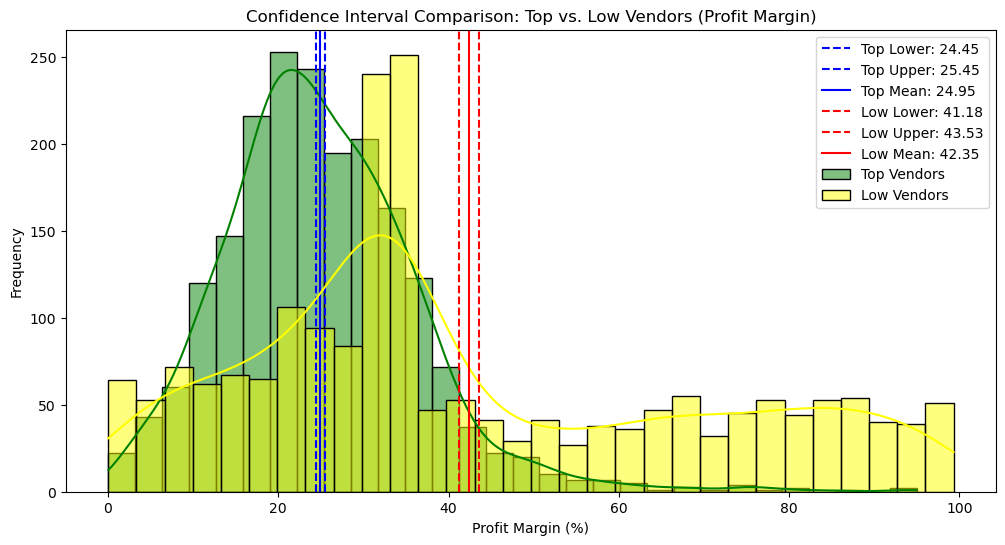

In [44]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="green", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="yellow", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Low-performing vendors have a significantly higher profit margin confidence interval, ranging from 41.18% to 43.53%, compared to top-performing vendors whose interval ranges from 24.45% to 25.45%.

This indicates that vendors with lower sales tend to maintain higher profit margins, which may be due to premium pricing, niche product positioning, or lower operational complexity.

For High-Performing Vendors:
Even though they generate higher sales volume, their margins are lower (mean: 24.95%). To improve profitability, they could explore selective price increases, cost efficiency programs, or bundled offerings to lift per-unit margins without hurting demand.

For Low-Performing Vendors:
Despite strong margins (mean: 42.35%), their low sales volume suggests challenges in demand generation, marketing reach, or pricing competitiveness. Strengthening promotion strategies or improving distribution could help convert their higher margin structure into actual revenue growth.

#Research Question 7 
Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [45]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -26.8067, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [51]:
import pandas as pd

df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.to_csv("vendor_sales_summary.csv", index=False)

print("Exported vendor_sales_summary.csv")


Exported vendor_sales_summary.csv


In [54]:
whos

Variable                     Type          Data/Info
----------------------------------------------------
autotexts                    list          n=11
ax                           Axes          Axes(0.1275,0.11;0.77x0.77)
ax1                          Axes          Axes(0.125,0.11;0.775x0.77)
ax2                          Axes          Axes(0.125,0.11;0.775x0.77)
bar                          Rectangle     Rectangle(xy=(0, 8.6), wi<...>+06, height=0.8, angle=0)
brand_performance            DataFrame                              <...>\n[3862 rows x 2 columns]
categorical_cols             list          n=2
centre_circle                Circle        Circle(xy=(0, 0), radius=0.7)
col                          str           Description
confidence_interval          function      <function confidence_inte<...>al at 0x000002288439B7E0>
conn                         Connection    <sqlite3.Connection object at 0x00000228FC9A8130>
correlation_matrix           DataFrame                            Ve

In [56]:
import pandas as pd

pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,vendor_sales_summary


In [57]:
# Brand performance table
brand_performance.to_csv("BrandPerformance.csv", index=False)

# If your low-turnover dataframe is vendor_performance filtered:
low_turnover_vendor = vendor_performance.copy()   # replace with your actual low-turnover DF
low_turnover_vendor.to_csv("LowTurnoverVendor.csv", index=False)

# If your purchase contribution table is vendor_performance with the PurchaseContribution% column:
purchase_contribution = vendor_performance.copy()  # or whatever DF you used
purchase_contribution.to_csv("PurchaseContribution.csv", index=False)


In [58]:
import os
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.spyder-py3',
 'anaconda3',
 'ansel',
 'AppData',
 'Application Data',
 'BrandPerformance.csv',
 'Capstone Project',
 'Code Files',
 'Contacts',
 'Cookies',
 'data',
 'Data Analysis and Cleaning.ipynb',
 'Database.ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'Final',
 'Final_Project',
 'get_vendor_summary.py',
 'ingestion_db.py',
 'IntelGraphicsProfiles',
 'inventory.db',
 'Jedi',
 'Links',
 'Local Settings',
 'logs',
 'LowTurnoverVendor.csv',
 'M',
 'Music',
 'My Documents',
 'My_Presentation.pptx',
 'NetHood',
 'NOVICA_OBJECTIVE1.ipynb',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.0.regtrans-ms',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.1.regtrans-ms',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.2.regtrans-ms',
 'NTUSER.DAT{2ad838bb-efea-11ee-a54d-000d3a94eaa1}.TxR.blf',